### Project outline: 

- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
- Goal is to predict the **total transaction revenue**. 
- Decide aboute a good evaluation strategy and justify your choice.
- Split dataset into train and test dataset. 
- Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy. 
- Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results. 
- Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result. 
- Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better? 

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization expected. 

### Dataset Description
This is an online Merchandise Store customer dataset. Goal is to predict the total transaction revenue. 
Each row in the dataset is one visit to the store. 

Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

## Import Packages

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Read Data

In [2]:
df = pd.read_csv('data.csv')

In [3]:
# how many rows and columns do we have?
df.shape

(20000, 22)

In [4]:
# here's a little information about the data we have
df.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,...,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,1
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,...,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,1
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,...,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
channelGrouping                   20000 non-null object
customDimensions                  20000 non-null object
date                              20000 non-null int64
device                            20000 non-null object
fullVisitorId                     20000 non-null uint64
geoNetwork                        20000 non-null object
hits                              20000 non-null object
socialEngagementType              20000 non-null object
trafficSource                     20000 non-null object
visitId                           20000 non-null int64
visitNumber                       20000 non-null int64
visitStartTime                    20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float6

In [6]:
# How many transaction data do we have?
df.totals_totalTransactionRevenue.isna().sum()
# we have 19807 NAs and only 193 transaction revenue data, which is a small number of target values

19807

## Data Wrangling

We have some columns in JSON format, we have to retrieve the columns and put it back into the dataframe.

First, I will get an idea of what columns are in each JSON columns and then retrieve the ones we would like to keep.

We have 5 columns in JSON format:
    1.customDimensions;
    2.device;
    3.geoNetwork;
    4.hits;
    5.trafficSource;

## customDimensions

In [7]:
df['customDimensions'][0]

"[{'index': '4', 'value': 'EMEA'}]"

We will be only taking 'value' out of customDimensions

In [8]:
def modify(col):
    a = col[1]
    if a.find("'") > 0:
        return a.split("'")[7]
    else:
        return 'Not Available'
dataset = df.apply(modify,axis = 'columns')
df['value'] = dataset

In [9]:
# here we have a little idea of what values there are in the value column
tmp = df['value'].value_counts()
tmp

North America      9288
EMEA               3775
Not Available      3605
APAC               2566
South America       468
Central America     298
Name: value, dtype: int64

Visualization of the counts of the values

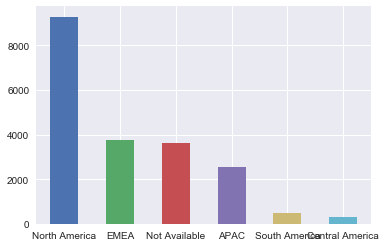

In [10]:
ax = tmp.plot.bar(x='value', y='counts', rot=0)

North America has much more value counts than other regions

## device

In [11]:
df['device'][0]

"{'mobileDeviceInfo': 'not available in demo dataset', 'screenResolution': 'not available in demo dataset', 'browserSize': 'not available in demo dataset', 'deviceCategory': 'desktop', 'mobileDeviceMarketingName': 'not available in demo dataset', 'operatingSystemVersion': 'not available in demo dataset', 'operatingSystem': 'Windows', 'browserVersion': 'not available in demo dataset', 'flashVersion': 'not available in demo dataset', 'mobileInputSelector': 'not available in demo dataset', 'language': 'not available in demo dataset', 'mobileDeviceModel': 'not available in demo dataset', 'browser': 'Firefox', 'isMobile': False, 'screenColors': 'not available in demo dataset', 'mobileDeviceBranding': 'not available in demo dataset'}"

We will be taking out 'deviceCategory', 'operatingSystem', 'browser' from device

'deviceCategory'

In [12]:
def modify(col):
    a = col[3]
    if a.find("'") > 0:
        return a.split("'")[15]
    else:
        return 'Not Available'
dataset = df.apply(modify,axis = 'columns')
df['deviceCategory'] = dataset
tmp = df['deviceCategory'].value_counts()
tmp
# We can tell that most of the customers were using a desktop

desktop    13988
mobile      5284
tablet       728
Name: deviceCategory, dtype: int64

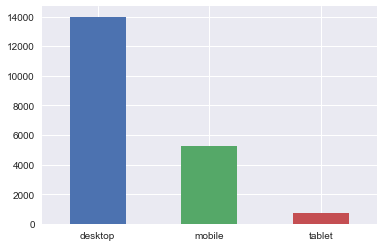

In [13]:
ax = tmp.plot.bar(x='deviceCategory', y='counts', rot=0)

Most of the visits came through desktop, with mobile raking second

'operatingSystem'

In [14]:
def modify(col):
    a = col[3]
    if a.find("'") > 0:
        return a.split("'")[27]
    else:
        return 'Not Available'
dataset = df.apply(modify,axis = 'columns')
df['operatingSystem'] = dataset
tmp = df['operatingSystem'].value_counts()
tmp
# At the very top, we have Windows as our operating system

Windows             7651
Macintosh           4928
Android             3205
iOS                 2583
Linux                812
Chrome OS            620
(not set)            131
Windows Phone         31
Tizen                 12
Samsung                9
Xbox                   5
BlackBerry             4
OS/2                   4
Firefox OS             2
Nintendo Wii           2
Playstation Vita       1
Name: operatingSystem, dtype: int64

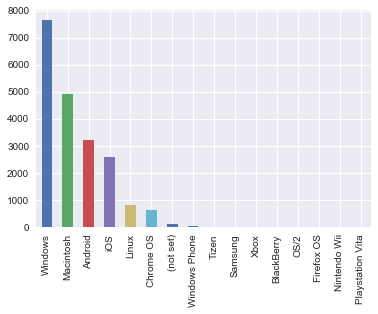

In [15]:
ax = tmp.plot.bar(x='operatingSystem', y='counts')

Most of the visits were from a Windows operating system, with Macintosh ranking second.

'browser'

In [16]:
def modify(col):
    a = col[3]
    if a.find("'") > 0:
        return a.split("'")[51]
    else:
        return 'Not Available'
dataset = df.apply(modify,axis = 'columns')
df['browser'] = dataset
tmp = df['browser'].value_counts()
tmp
# Chrome is at the top

Chrome                      13978
Safari                       3340
Firefox                       829
Internet Explorer             530
Android Webview               300
Edge                          267
Opera Mini                    191
Safari (in-app)               139
Samsung Internet              137
Opera                         134
UC Browser                     48
YaBrowser                      36
Amazon Silk                    20
Coc Coc                        14
Android Browser                11
Mozilla Compatible Agent        5
MRCHROME                        5
BlackBerry                      4
Puffin                          3
Nokia Browser                   2
Nintendo Browser                2
Maxthon                         2
SeaMonkey                       1
Playstation Vita Browser        1
ADM                             1
Name: browser, dtype: int64

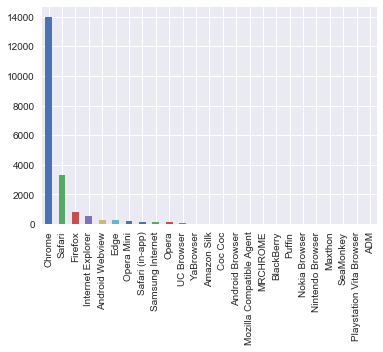

In [17]:
ax = tmp.plot.bar(x='browser', y='counts')

Most of the visits came through Chrome

## geoNetwork

We will be only getting 'continent' and 'country' out of geoNetwork

'Continent'

In [18]:
df['geoNetwork'][8]

"{'cityId': 'not available in demo dataset', 'metro': '(not set)', 'subContinent': 'Central America', 'continent': 'Americas', 'region': 'Mexico City', 'city': 'Mexico City', 'networkDomain': 'uninet-ide.com.mx', 'country': 'Mexico', 'networkLocation': 'not available in demo dataset', 'longitude': 'not available in demo dataset', 'latitude': 'not available in demo dataset'}"

In [19]:
def modify(col):
    a = col[5]
    if a.find("'") > 0:
        return a.split("'")[15]
    else:
        return 'Not Available'
dataset = df.apply(modify,axis = 'columns')
df['continent'] = dataset
tmp = df['continent'].value_counts()
tmp
# Most of the visits came from the Americas

Americas     10521
Europe        4511
Asia          4253
Africa         357
Oceania        337
(not set)       21
Name: continent, dtype: int64

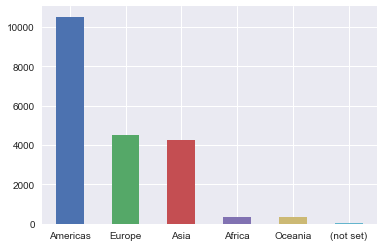

In [20]:
ax = tmp.plot.bar(x='browser', y='counts', rot = 0)

Here we can see that most of the visits came from the Americans, with Europe and Asia placing second and thrid

 'country'

In [21]:
def modify(col):
    a = col[5]
    if a.find("'") > 0:
        return a.split("'")[31]
    else:
        return 'Not Available'
dataset = df.apply(modify,axis = 'columns')
df['country'] = dataset
tmp = df['country'].value_counts().head(10)
tmp
# Most the visits came from the United States

United States     8663
India             1081
United Kingdom     866
Canada             622
Japan              488
Germany            461
France             420
Taiwan             411
Brazil             336
Turkey             303
Name: country, dtype: int64

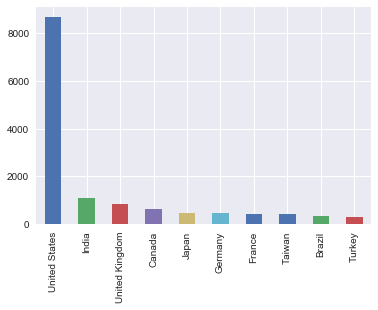

In [22]:
ax = tmp.plot.bar(x='country', y='counts')

If we ranked by country, the US has a significant lead than other countries.

## Hits

In [23]:
df['hits'][0]

"[{'hitNumber': '1', 'time': '0', 'hour': '17', 'minute': '0', 'isInteraction': True, 'isEntrance': True, 'isExit': True, 'referer': 'https://www.google.co.uk/search?q=water+bottle&ie=utf-8&num=100&oe=utf-8&hl=en&gl=GB&uule=w+CAIQIFISCamRx0IRO1oCEXoliDJDoPjE&glp=1&gws_rd=cr&fg=1', 'page': {'pagePath': '/google+redesign/bags/water+bottles+and+tumblers', 'hostname': 'shop.googlemerchandisestore.com', 'pageTitle': 'Water Bottles & Tumblers | Drinkware | Google Merchandise Store', 'pagePathLevel1': '/google+redesign/', 'pagePathLevel2': '/bags/', 'pagePathLevel3': '/water+bottles+and+tumblers', 'pagePathLevel4': ''}, 'transaction': {'currencyCode': 'USD'}, 'item': {'currencyCode': 'USD'}, 'appInfo': {'screenName': 'shop.googlemerchandisestore.com/google+redesign/bags/water+bottles+and+tumblers', 'landingScreenName': 'shop.googlemerchandisestore.com/google+redesign/bags/water+bottles+and+tumblers', 'exitScreenName': 'shop.googlemerchandisestore.com/google+redesign/bags/water+bottles+and+tum

We are only going to retrieve hitNumber from hits

In [24]:
def modify(col):
    a = col[6]
    if a.find("'") > 0:
        return a.split("'")[3]
    else:
        return 0
dataset = df.apply(modify,axis = 'columns')
df['hitNumber'] = dataset
tmp = df['hitNumber'].value_counts()
tmp

1     19917
2        57
3         7
0         6
6         2
5         2
7         2
10        1
32        1
13        1
9         1
16        1
8         1
20        1
Name: hitNumber, dtype: int64

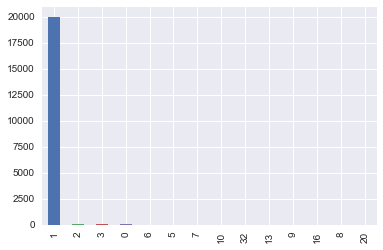

In [25]:
ax = tmp.plot.bar(x='hitnumber', y='counts')

We can see that there was mostly 1 hit.

## trafficSource
We will get the first column for traffic source to see if campaign, referral, or direct have any influence on total transactional revenue.

In [26]:
df['trafficSource'][17]

"{'campaign': '(not set)', 'source': 'google', 'adwordsClickInfo': {'criteriaParameters': 'not available in demo dataset'}, 'medium': 'organic', 'keyword': '(not provided)'}"

In [27]:
def modify(col):
    a = col[8]
    if a.find("'") > 0:
        return a.split("'")[1]
    else:
        return 0
dataset = df.apply(modify,axis = 'columns')
df['source'] = dataset
tmp = df['source'].value_counts()
tmp

campaign        8841
referralPath    6104
isTrueDirect    5055
Name: source, dtype: int64

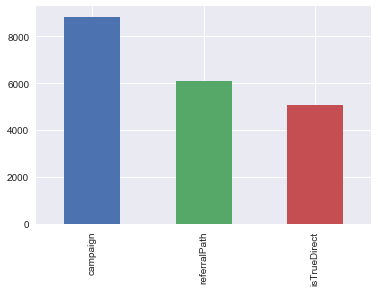

In [28]:
ax = tmp.plot.bar(x='trafficsource', y='counts')

Most of our visits came through campaign, with referral in second place and direct in the last.

Let's take a look at our dataset now

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
channelGrouping                   20000 non-null object
customDimensions                  20000 non-null object
date                              20000 non-null int64
device                            20000 non-null object
fullVisitorId                     20000 non-null uint64
geoNetwork                        20000 non-null object
hits                              20000 non-null object
socialEngagementType              20000 non-null object
trafficSource                     20000 non-null object
visitId                           20000 non-null int64
visitNumber                       20000 non-null int64
visitStartTime                    20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float6

After we drop the JSON style columns and columns we would not use in our training datasets, we take a look at what our data looks like

In [30]:
df = df.drop(columns = ['customDimensions','device', 'geoNetwork','hits','trafficSource','date','fullVisitorId','visitId','visitStartTime','socialEngagementType'])
df.head()

,channelGrouping,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits,value,deviceCategory,operatingSystem,browser,continent,country,hitNumber,source
0,Organic Search,1,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1,EMEA,desktop,Windows,Firefox,Europe,Germany,1,campaign
1,Referral,6,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1,North America,desktop,Chrome OS,Chrome,Americas,United States,1,referralPath
2,Direct,1,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,1,North America,mobile,Android,Chrome,Americas,United States,1,isTrueDirect
3,Organic Search,1,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,1,EMEA,desktop,Windows,Chrome,Asia,Turkey,1,campaign
4,Organic Search,1,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,1,Central America,desktop,Windows,Chrome,Americas,Mexico,1,campaign


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
channelGrouping                   20000 non-null object
visitNumber                       20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float64
totals_sessionQualityDim          9120 non-null float64
totals_timeOnSite                 10101 non-null float64
totals_totalTransactionRevenue    193 non-null float64
totals_transactionRevenue         193 non-null float64
totals_transactions               196 non-null float64
totals_visits                     20000 non-null int64
value                             20000 non-null object
deviceCategory                    20000 non-null object
operatingSystem                   20000 non-null object
browser                           20000 non-null objec

## Feature Engineering

We can only use numerical features for machine learning, so we have to change all the object and units into int or float

### channelGrouping

In [32]:
tmp = df['channelGrouping'].value_counts()
tmp

Organic Search    9535
Social            3455
Direct            3047
Referral          2649
Paid Search        527
Affiliates         425
Display            362
Name: channelGrouping, dtype: int64

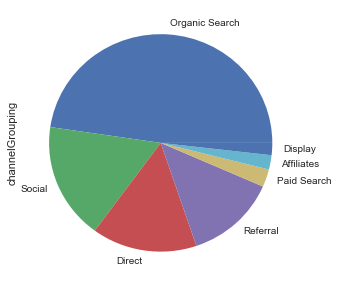

In [33]:
plot = tmp.plot.pie( figsize=(5, 5))

Most of the traffic came through organic search.

We will start to create dummies and changing the types of the dummies to int. We can see which channel that came to our website which generated the most total transaction revenue.

In [34]:
cg_dummies = pd.get_dummies(df.channelGrouping, prefix = 'channelGrouping')
cg_dummies = cg_dummies.astype(int)
df = pd.concat([df, cg_dummies], axis = 1)

We have created some dummies for the channelGrouping columns, take a look.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
channelGrouping                   20000 non-null object
visitNumber                       20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float64
totals_sessionQualityDim          9120 non-null float64
totals_timeOnSite                 10101 non-null float64
totals_totalTransactionRevenue    193 non-null float64
totals_transactionRevenue         193 non-null float64
totals_transactions               196 non-null float64
totals_visits                     20000 non-null int64
value                             20000 non-null object
deviceCategory                    20000 non-null object
operatingSystem                   20000 non-null object
browser                           20000 non-null objec

### deviceCategory

In [36]:
df['deviceCategory'].value_counts()

desktop    13988
mobile      5284
tablet       728
Name: deviceCategory, dtype: int64

Seems like we have three categories for device. We can see that which device in the three is attributing the total transaction revenue the most.

Get dummies for device categories and change data type.

In [37]:
dc_dummies = pd.get_dummies(df.deviceCategory, prefix = 'deviceCategory')
dc_dummies = dc_dummies.astype(int)
df = pd.concat([df, dc_dummies], axis = 1)
df = df.drop(columns = ['deviceCategory'])

We have created some dummies for the deviceCategory column, take a look.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
channelGrouping                   20000 non-null object
visitNumber                       20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float64
totals_sessionQualityDim          9120 non-null float64
totals_timeOnSite                 10101 non-null float64
totals_totalTransactionRevenue    193 non-null float64
totals_transactionRevenue         193 non-null float64
totals_transactions               196 non-null float64
totals_visits                     20000 non-null int64
value                             20000 non-null object
operatingSystem                   20000 non-null object
browser                           20000 non-null object
continent                         20000 non-null objec

### continent

In [39]:
df['continent'].value_counts()

Americas     10521
Europe        4511
Asia          4253
Africa         357
Oceania        337
(not set)       21
Name: continent, dtype: int64

We have 5 categories for continent, we will then create dummies for all of them. We can see how people from different continents are contributing to our total transaction revenue.

In [40]:
c_dummies = pd.get_dummies(df.continent, prefix = 'continent')
c_dummies = c_dummies.astype(int)
df = pd.concat([df, c_dummies], axis = 1)
df = df.drop(columns = ['continent'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
channelGrouping                   20000 non-null object
visitNumber                       20000 non-null int64
totals_bounces                    9873 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  15088 non-null float64
totals_pageviews                  19999 non-null float64
totals_sessionQualityDim          9120 non-null float64
totals_timeOnSite                 10101 non-null float64
totals_totalTransactionRevenue    193 non-null float64
totals_transactionRevenue         193 non-null float64
totals_transactions               196 non-null float64
totals_visits                     20000 non-null int64
value                             20000 non-null object
operatingSystem                   20000 non-null object
browser                           20000 non-null object
country                           20000 non-null objec

### operatingSystem

In [41]:
df['operatingSystem'].value_counts()

Windows             7651
Macintosh           4928
Android             3205
iOS                 2583
Linux                812
Chrome OS            620
(not set)            131
Windows Phone         31
Tizen                 12
Samsung                9
Xbox                   5
BlackBerry             4
OS/2                   4
Firefox OS             2
Nintendo Wii           2
Playstation Vita       1
Name: operatingSystem, dtype: int64

We have quite a few categories for operating system, I would like to keep the top 6. We will create dummy variables for them. We can test that if operating systems have any influence on the total transaction revenue.

In [42]:
os_dummies = pd.get_dummies(df.operatingSystem, prefix = 'operatingSystem')
os_dummies = os_dummies.astype(int)
df = pd.concat([df, os_dummies], axis = 1)
df = df.drop(columns = ['operatingSystem'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 49 columns):
channelGrouping                     20000 non-null object
visitNumber                         20000 non-null int64
totals_bounces                      9873 non-null float64
totals_hits                         20000 non-null int64
totals_newVisits                    15088 non-null float64
totals_pageviews                    19999 non-null float64
totals_sessionQualityDim            9120 non-null float64
totals_timeOnSite                   10101 non-null float64
totals_totalTransactionRevenue      193 non-null float64
totals_transactionRevenue           193 non-null float64
totals_transactions                 196 non-null float64
totals_visits                       20000 non-null int64
value                               20000 non-null object
browser                             20000 non-null object
country                             20000 non-null object
hitNumber               

### browser

We have a few browsers that came to our website. We will pick the top few and make dummies out of them. We can see that if different browsers have effect on our total transaction revenue.

In [43]:
df['browser'].value_counts()

Chrome                      13978
Safari                       3340
Firefox                       829
Internet Explorer             530
Android Webview               300
Edge                          267
Opera Mini                    191
Safari (in-app)               139
Samsung Internet              137
Opera                         134
UC Browser                     48
YaBrowser                      36
Amazon Silk                    20
Coc Coc                        14
Android Browser                11
Mozilla Compatible Agent        5
MRCHROME                        5
BlackBerry                      4
Puffin                          3
Nokia Browser                   2
Nintendo Browser                2
Maxthon                         2
SeaMonkey                       1
Playstation Vita Browser        1
ADM                             1
Name: browser, dtype: int64

In [44]:
b_dummies = pd.get_dummies(df.browser, prefix = 'browser')
b_dummies = b_dummies.astype(int)
df = pd.concat([df, b_dummies], axis = 1)
df = df.drop(columns = ['browser'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 73 columns):
channelGrouping                     20000 non-null object
visitNumber                         20000 non-null int64
totals_bounces                      9873 non-null float64
totals_hits                         20000 non-null int64
totals_newVisits                    15088 non-null float64
totals_pageviews                    19999 non-null float64
totals_sessionQualityDim            9120 non-null float64
totals_timeOnSite                   10101 non-null float64
totals_totalTransactionRevenue      193 non-null float64
totals_transactionRevenue           193 non-null float64
totals_transactions                 196 non-null float64
totals_visits                       20000 non-null int64
value                               20000 non-null object
country                             20000 non-null object
hitNumber                           20000 non-null object
source                  

### Source

We can see the effect of different advertisement or no advertisement will increase total transaction revenue or not.
There are only three categories, and we can simple make dummies out of them.

In [45]:
s_dummies = pd.get_dummies(df.source, prefix = 'source')
s_dummies = s_dummies.astype(float)
df = pd.concat([df, s_dummies], axis = 1)
df = df.drop(columns = ['source'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 75 columns):
channelGrouping                     20000 non-null object
visitNumber                         20000 non-null int64
totals_bounces                      9873 non-null float64
totals_hits                         20000 non-null int64
totals_newVisits                    15088 non-null float64
totals_pageviews                    19999 non-null float64
totals_sessionQualityDim            9120 non-null float64
totals_timeOnSite                   10101 non-null float64
totals_totalTransactionRevenue      193 non-null float64
totals_transactionRevenue           193 non-null float64
totals_transactions                 196 non-null float64
totals_visits                       20000 non-null int64
value                               20000 non-null object
country                             20000 non-null object
hitNumber                           20000 non-null object
channelGrouping_Affiliat

We drop the columns that we don't want to shrink our dataset

In [46]:
df = df.drop(columns = ['continent_(not set)','operatingSystem_(not set)','operatingSystem_Tizen','operatingSystem_Windows Phone','operatingSystem_Xbox','operatingSystem_BlackBerry','operatingSystem_Samsung','operatingSystem_Firefox OS','operatingSystem_Nintendo Wii','operatingSystem_OS/2','operatingSystem_Playstation Vita', 'channelGrouping'])
df = df.drop(columns = ['value','country','browser_ADM','browser_Amazon Silk','browser_Android Browser','browser_BlackBerry','browser_Coc Coc','browser_MRCHROME','browser_Maxthon','browser_Mozilla Compatible Agent','browser_Nintendo Browser','browser_Nokia Browser','browser_Opera','browser_Opera Mini','browser_Playstation Vita Browser','browser_Puffin','browser_Safari (in-app)','browser_Samsung Internet','browser_SeaMonkey','browser_UC Browser','browser_YaBrowser'])

We fill in all the missing data with zeros and transform the data type of hitnumber. We suppose that a higher hitnumber will lead to more total transaction revenue.

Here we have cleaned our data, took the variables we wanted out, made it a balanced data, and all numerical. We can start apply machine learning models to our data.

In [47]:
df['hitNumber'] = pd.to_numeric(df['hitNumber'])
df.fillna(0,inplace = True)
df = df.drop(columns = ['totals_transactionRevenue','totals_transactions'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
visitNumber                       20000 non-null int64
totals_bounces                    20000 non-null float64
totals_hits                       20000 non-null int64
totals_newVisits                  20000 non-null float64
totals_pageviews                  20000 non-null float64
totals_sessionQualityDim          20000 non-null float64
totals_timeOnSite                 20000 non-null float64
totals_totalTransactionRevenue    20000 non-null float64
totals_visits                     20000 non-null int64
hitNumber                         20000 non-null int64
channelGrouping_Affiliates        20000 non-null int32
channelGrouping_Direct            20000 non-null int32
channelGrouping_Display           20000 non-null int32
channelGrouping_Organic Search    20000 non-null int32
channelGrouping_Paid Search       20000 non-null int32
channelGrouping_Referral          20000 non-null int32

## Split data into feature and target, train and test

Feature Matrix

In [48]:
X = df.drop('totals_totalTransactionRevenue', axis = 1)
X.shape

(20000, 39)

Target Array

In [49]:
y= df['totals_totalTransactionRevenue']
y.shape

(20000,)

We then do split test by using train_test_split, data is seperated into Xtrain, Xtest, ytrain, ytest.

In [50]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

We have allocated 15000 rows to our training data and 5000 to our testing data

In [51]:
Xtrain.shape

(15000, 39)

In [52]:
Xtest.shape

(5000, 39)

In [105]:
ytrain.shape

(15000,)

In [106]:
ytest.shape

(5000,)

## Scaling Data

I will use StandardScaler for scaling my data so that the variance can be standardized.

In [53]:
from sklearn.preprocessing import StandardScaler 
std = StandardScaler()

Xtrain = std.fit_transform(Xtrain)
Xtest = std.transform(Xtest)

## Supervised Model

I will use KNN regression and Ridge regression for my supervised model

##### KNN

First I will make a plot to see how many Ks I would use, seems like I would be using more than 10.

Text(0,0.5,'MSE')

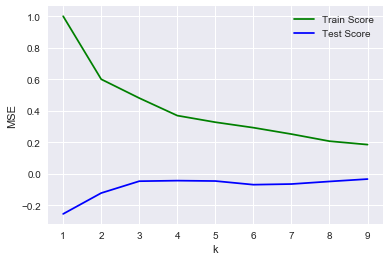

In [54]:
from sklearn.neighbors import KNeighborsRegressor
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(Xtrain, ytrain)
    train_score_array.append(knn_reg.score(Xtrain, ytrain))
    test_score_array.append(knn_reg.score(Xtest, ytest))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

I don't know how many Ks I would have to use, so I find the best fit using gridsearch.

In [136]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5)
grid_knn.fit(Xtrain, ytrain)
grid_knn.score(Xtrain, ytrain)

0.11253393752869935

This is our best score 

Now we test it on our testing datasets

In [104]:
grid_knn.score(Xtest, ytest)

0.03178629064343508

In [57]:
grid_knn.best_params_

{'n_neighbors': 20}

We use cross_val_score to cross validate our data on five folds and then get the mean of the five scores. That would be our R2 for this model on this dataset.

In [129]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(knn, X, y, cv=5, scoring='r2')
scores

array([-0.49881622, -0.09720062, -0.11720316, -0.36397059, -1.18508231])

In [130]:
scores.mean()

-0.4524545785094273

##### Ridge

We look at the correlation matrix first as ridge regression is used to mitigate multicollinearity effects.

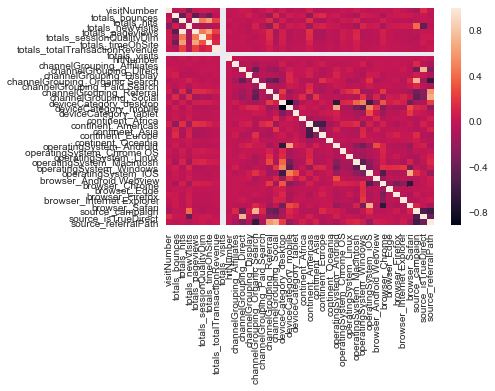

In [60]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

We can see that there are some high correlation between some variables, so we can try to fit the ridge regression to see if it will increase our model score

In [61]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(Xtrain,ytrain)
    train_score_list.append(ridge.score(Xtrain,ytrain))
    test_score_list.append(ridge.score(Xtest, ytest))

Text(0.5,0,'$\\alpha$')

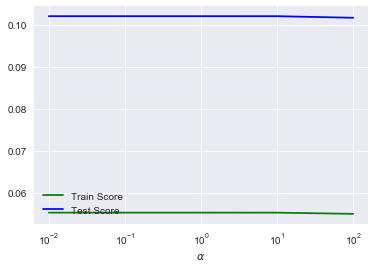

In [62]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

We use grid search to find the best fit for ridge.

In [63]:
ridge = Ridge()
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(ridge, param_grid=param_grid, cv = 5)
grid_ridge.fit(Xtrain, ytrain)
grid_ridge.score(Xtrain, ytrain)

0.054990797613087776

In [132]:
grid_ridge.score(Xtest, ytest)

0.10166782494287628

In [65]:
grid_ridge.best_params_

{'alpha': 100}

We then use cross_val_score to cross validate our model with the whole data then get the average score of the 5 R2s to test how good our model is.

In [133]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')
scores

array([-0.0046764 , -0.0007685 , -0.00013197, -0.00096547, -0.00718244])

In [134]:
scores.mean()

-0.0027449550989414374

## Unsupervised Model

### Clustering

#####  KMeans

First, I will plot an Elbow Curve to see how many cluster we should use for clustering

In [142]:
import pylab as pl
import pandas
from sklearn.cluster import KMeans

In [143]:
Y = y
Y = Y[:, np.newaxis]

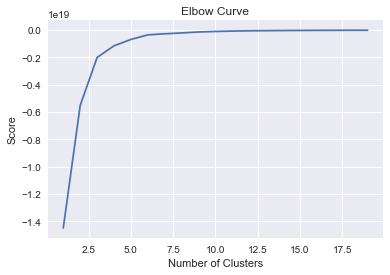

In [144]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I will choose 3 clusters based on the Elbow Curve since the elbow is around 3

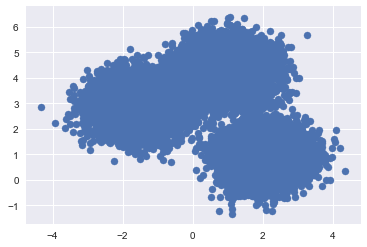

In [161]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=20000, centers=3,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [162]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

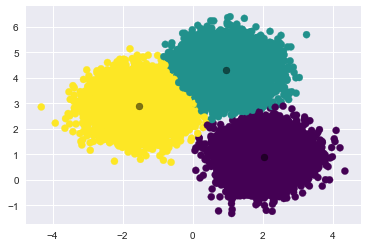

In [163]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5)

As a result, out of 20000 datapoints, we seperate it into Three clusters.

##### GaussianMixture

We are going to cuntinue using the results from the elbow curve, which is 3 clusters. Then fit it into the Gaussian Mixture.

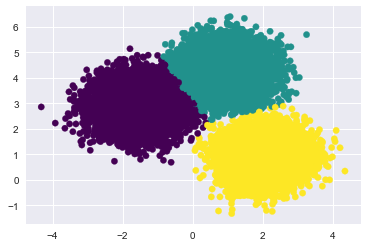

In [164]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

The predict_proba gives us the probability that any point belongs to one of the three clusters.

In [177]:
probs = gmm.predict_proba(X)
print(probs[:10].round(3))

[[0.    0.003 0.997]
 [0.998 0.002 0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.989 0.011 0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]]


### Dimensional Reduction

#### ISO Map

In [90]:
from sklearn.manifold import Isomap

In [91]:
iso = Isomap(n_components=2)
iso.fit(Xtrain)
data_projected = iso.transform(Xtrain)
data_projected.shape

(15000, 2)

We used ISO Map to reduce to only 2 dimensions

##### Use reduced dataset on supervised learning above

We used the reduced dataset on the KNN Regressor we used in supervise training

In [97]:
knn3 = KNeighborsRegressor(n_neighbors=4)
knn4 = KNeighborsRegressor(n_neighbors=4)

In [98]:
knn3.fit(Xtrain, ytrain)
knn4.fit(data_projected, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=2,
          weights='uniform')

Original Dataset

In [99]:
knn3.score(Xtrain, ytrain)

0.36997090426729795

Transformed Dataset

In [100]:
knn4.score(data_projected, ytrain)

0.2914060753535175

Compared with each other, we can see that the model score decreased a little. This is within prediction, because we lost imformation while using dimention reduction (ISO Map), but now we have less dimensions which will robust our dataset and model.

##### PCA

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(Xtrain)
X_test_pca = pca.transform(Xtest)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.10804452e-01, 9.08539030e-02, 7.53910170e-02, 6.27116581e-02,
       5.59559133e-02, 5.21606959e-02, 3.66973215e-02, 3.34725193e-02,
       3.18510808e-02, 3.14884356e-02, 2.95251771e-02, 2.87860686e-02,
       2.78197852e-02, 2.71402451e-02, 2.69982632e-02, 2.64640008e-02,
       2.61943429e-02, 2.59593189e-02, 2.50605582e-02, 2.49716186e-02,
       2.35604160e-02, 2.17723198e-02, 2.08996304e-02, 2.03586250e-02,
       1.90889609e-02, 1.58242376e-02, 1.14729577e-02, 8.17402433e-03,
       5.22705535e-03, 2.04897884e-03, 6.62464350e-04, 4.36031570e-04,
       1.20523284e-04, 4.73994760e-05, 2.18523252e-32, 1.34999534e-32,
       4.60296560e-33, 1.50185149e-33, 7.44679590e-34])

We can visualize it and decide how many components we want.

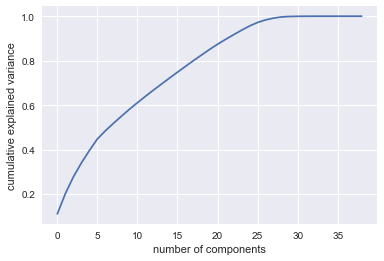

In [77]:
pca = PCA().fit(Xtrain)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We look at the explained_variance to see how many components we want to use.

We would like to use 6 components as it explaines around 45% of the variance in our data

In [78]:
pca = PCA(n_components = 6)
X_train = pca.fit_transform(Xtrain)
X_test = pca.transform(Xtest)

In [79]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
y_pred = classifier.predict(X_test)

#### Use reduced dataset on supervised learning above

We used the reduced dataset on the KNN Regressor we used in supervise training

In [81]:
knn1 = KNeighborsRegressor(n_neighbors=2)
knn2 = KNeighborsRegressor(n_neighbors=2)

In [82]:
knn1.fit(Xtrain, ytrain)
knn2.fit(X_train, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

Original Dataset

In [83]:
knn1.score(Xtrain, ytrain)

0.6005269141047757

Reduced Dataset

In [84]:
knn2.score(X_train, ytrain)

0.5371778359671764

Compared with each other, we can see that the model score decreased a little. 
This is within prediction, because we lost imformation while using dimention reduction (PCA), but now we have less dimensions which will robust our dataset and model.